In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import matplotlib

from pycaret.regression import *
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

In [41]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [42]:
train_set = pd.read_csv('train.csv').iloc[:,1:]
train_set

,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),풍속(m/s),부두길이(m),전면수심(m),부지면적(^m),...,입항시_23,입항시_3,입항시_4,입항시_5,입항시_6,입항시_7,입항시_8,입항시_9,작업효율,작업시간(분)
0,2,421,389,0,7.3,0.0,3.8,1500.0,15.5,1151000,...,0,0,0,0,0,0,0,0,1388.888889,1960.0
1,14,187,82,0,13.9,0.0,0.8,1500.0,15.5,1151000,...,0,0,0,0,0,0,0,0,852.382353,750.0
2,4,1300,1200,0,-5.6,0.0,4.2,1200.0,16.0,840000,...,0,0,0,0,0,0,0,0,1488.000000,1080.0
3,3,218,214,0,19.0,0.0,6.1,2000.0,16.5,1210000,...,0,0,0,0,0,0,1,0,610.400000,597.0
4,6,484,957,0,20.4,0.0,1.8,826.0,15.0,294000,...,0,0,0,0,0,0,0,0,1764.571429,3480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48463,10,609,1250,0,14.4,0.0,2.1,1150.0,16.5,553000,...,0,0,0,1,0,0,0,0,1025.792453,1170.0
48464,5,506,547,0,26.6,0.0,0.5,1500.0,15.5,1151000,...,0,0,0,0,0,0,0,1,1070.415094,1470.0
48465,1,1046,796,0,-1.9,0.0,2.2,800.0,18.0,480000,...,0,0,0,0,0,0,0,0,1165.507463,1320.0
48466,27,319,165,0,23.2,0.0,2.5,1500.0,15.5,1151000,...,0,0,0,0,0,0,0,0,873.495238,1230.0


In [43]:
test_set = pd.read_csv('test.csv').iloc[:,1:]
test_set

,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),풍속(m/s),부두길이(m),전면수심(m),부지면적(^m),...,입항시_23,입항시_3,입항시_4,입항시_5,입항시_6,입항시_7,입항시_8,입항시_9,작업효율,작업시간(분)
0,2,1341,2064,78,14.00,0.0,1.00,1100.0,18.00,688000,...,0,0,0,0,0,0,0,0,1784.125000,2270.0
1,8,255,511,0,18.00,0.0,0.90,600.0,14.00,195000,...,0,0,0,0,0,0,0,0,776.666667,870.0
2,53,300,300,0,25.84,6.3,2.08,1040.0,14.00,416000,...,0,0,0,0,0,0,0,0,894.690141,900.0
3,2,694,499,0,-5.50,0.0,2.50,800.0,18.00,480000,...,0,0,0,0,0,0,0,0,799.210526,930.0
4,43,291,278,0,26.90,0.0,4.00,1500.0,15.50,1151000,...,0,0,0,0,0,0,0,1,989.970297,1380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12112,14,60,60,0,28.00,0.0,4.70,1224.0,18.00,768125,...,0,0,0,0,0,0,0,0,629.106667,480.0
12113,21,391,476,0,23.30,0.1,0.70,2000.0,16.50,1210000,...,0,0,0,0,0,1,0,0,923.222222,885.0
12114,5,272,287,0,14.40,0.0,4.70,826.0,15.00,294000,...,0,0,0,0,0,0,0,0,387.800000,960.0
12115,1,275,393,0,-2.00,0.0,3.60,1224.0,16.25,768125,...,0,0,0,0,0,0,0,0,856.076923,980.0


In [44]:
X_train = train_set.drop('작업시간(분)', axis = 1)
y_train = train_set['작업시간(분)']
X_test = test_set.drop('작업시간(분)', axis = 1)
y_test = test_set['작업시간(분)']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((48468, 120), (48468,), (12117, 120), (12117,))

In [45]:
fa = FactorAnalyzer(n_factors = 13, method = 'ml')
fa.fit(X_train)
ev, v = fa.get_eigenvalues()
ev

array([ 6.97291788e+00,  3.71918096e+00,  3.05422262e+00,  2.81892195e+00,
        2.36073321e+00,  2.11195904e+00,  2.06805245e+00,  2.01945104e+00,
        1.94910531e+00,  1.76282762e+00,  1.71436634e+00,  1.63779292e+00,
        1.61669987e+00,  1.33287292e+00,  1.29174853e+00,  1.27966603e+00,
        1.23669961e+00,  1.19242301e+00,  1.17263618e+00,  1.15748276e+00,
        1.15394129e+00,  1.13794818e+00,  1.13174232e+00,  1.12814927e+00,
        1.12515837e+00,  1.11804646e+00,  1.11513754e+00,  1.10891593e+00,
        1.10682170e+00,  1.09851400e+00,  1.09297295e+00,  1.09023413e+00,
        1.08927608e+00,  1.08691241e+00,  1.08395980e+00,  1.07507243e+00,
        1.07280193e+00,  1.07061874e+00,  1.06798992e+00,  1.06557200e+00,
        1.06313292e+00,  1.06118129e+00,  1.05964511e+00,  1.05599012e+00,
        1.05244170e+00,  1.05029533e+00,  1.04786968e+00,  1.04489256e+00,
        1.04353588e+00,  1.04267125e+00,  1.04242479e+00,  1.04011848e+00,
        1.03702457e+00,  

AttributeError: module 'seaborn' has no attribute 'grid'

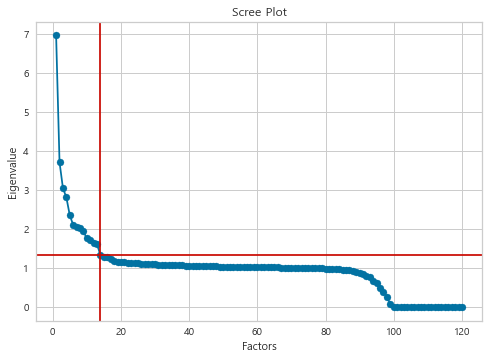

In [48]:
plt.scatter(range(1,X_train.shape[1]+1),ev, color = 'b')
plt.plot(range(1,X_train.shape[1]+1),ev, color = 'b')
plt.axvline(14, color = 'r')
plt.axhline(1.33287292e+00, color = 'r')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
sns.grid()
plt.show()

In [49]:
items = X_train.columns
fa_result = pd.DataFrame(fa.loadings_, index = items)
fa_result

,0,1,2,3,4,5,6,7,8,9,10,11,12
VOYAGE,0.008918,-0.138798,0.022684,0.088527,0.081068,-0.067266,0.024105,0.431244,-0.093077,-0.007313,-0.045118,-0.069274,-0.043231
LOD_CNT,0.109191,0.847167,0.026462,0.157094,0.052451,0.045119,0.046894,0.004783,0.132084,-0.022266,-0.039200,0.008217,0.129286
DIS_CNT,0.085182,0.881902,0.025867,0.142998,0.067547,0.041087,0.051995,0.021653,0.165056,-0.018527,-0.044679,-0.005820,0.141945
SHFT_CNT,0.039611,0.571903,-0.041238,0.034692,0.008334,0.069171,0.035498,-0.008449,0.138735,0.011535,-0.039356,0.012296,0.008214
기온(°C),0.024552,0.004276,-0.070127,-0.001370,-0.026661,-0.033515,-0.028711,-0.031056,-0.017275,-0.025171,-0.007924,0.025311,-0.146639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
입항시_6,0.021915,0.018045,-0.029949,0.024702,-0.001421,-0.020976,-0.029388,0.000081,-0.026590,0.058980,0.017193,0.018581,0.157060
입항시_7,-0.010926,-0.002061,0.001457,-0.004105,-0.034183,-0.056998,-0.017495,0.105730,-0.001054,0.056448,0.060425,0.013813,0.191188
입항시_8,-0.029720,-0.005454,0.066546,0.007505,0.022644,0.059364,0.039675,-0.019232,0.000002,0.021776,0.007342,0.019510,-0.341139
입항시_9,-0.048590,-0.023635,-0.065521,0.031847,0.010788,0.005062,-0.011503,-0.019956,-0.016631,0.011223,-0.038731,-0.021574,-0.212760


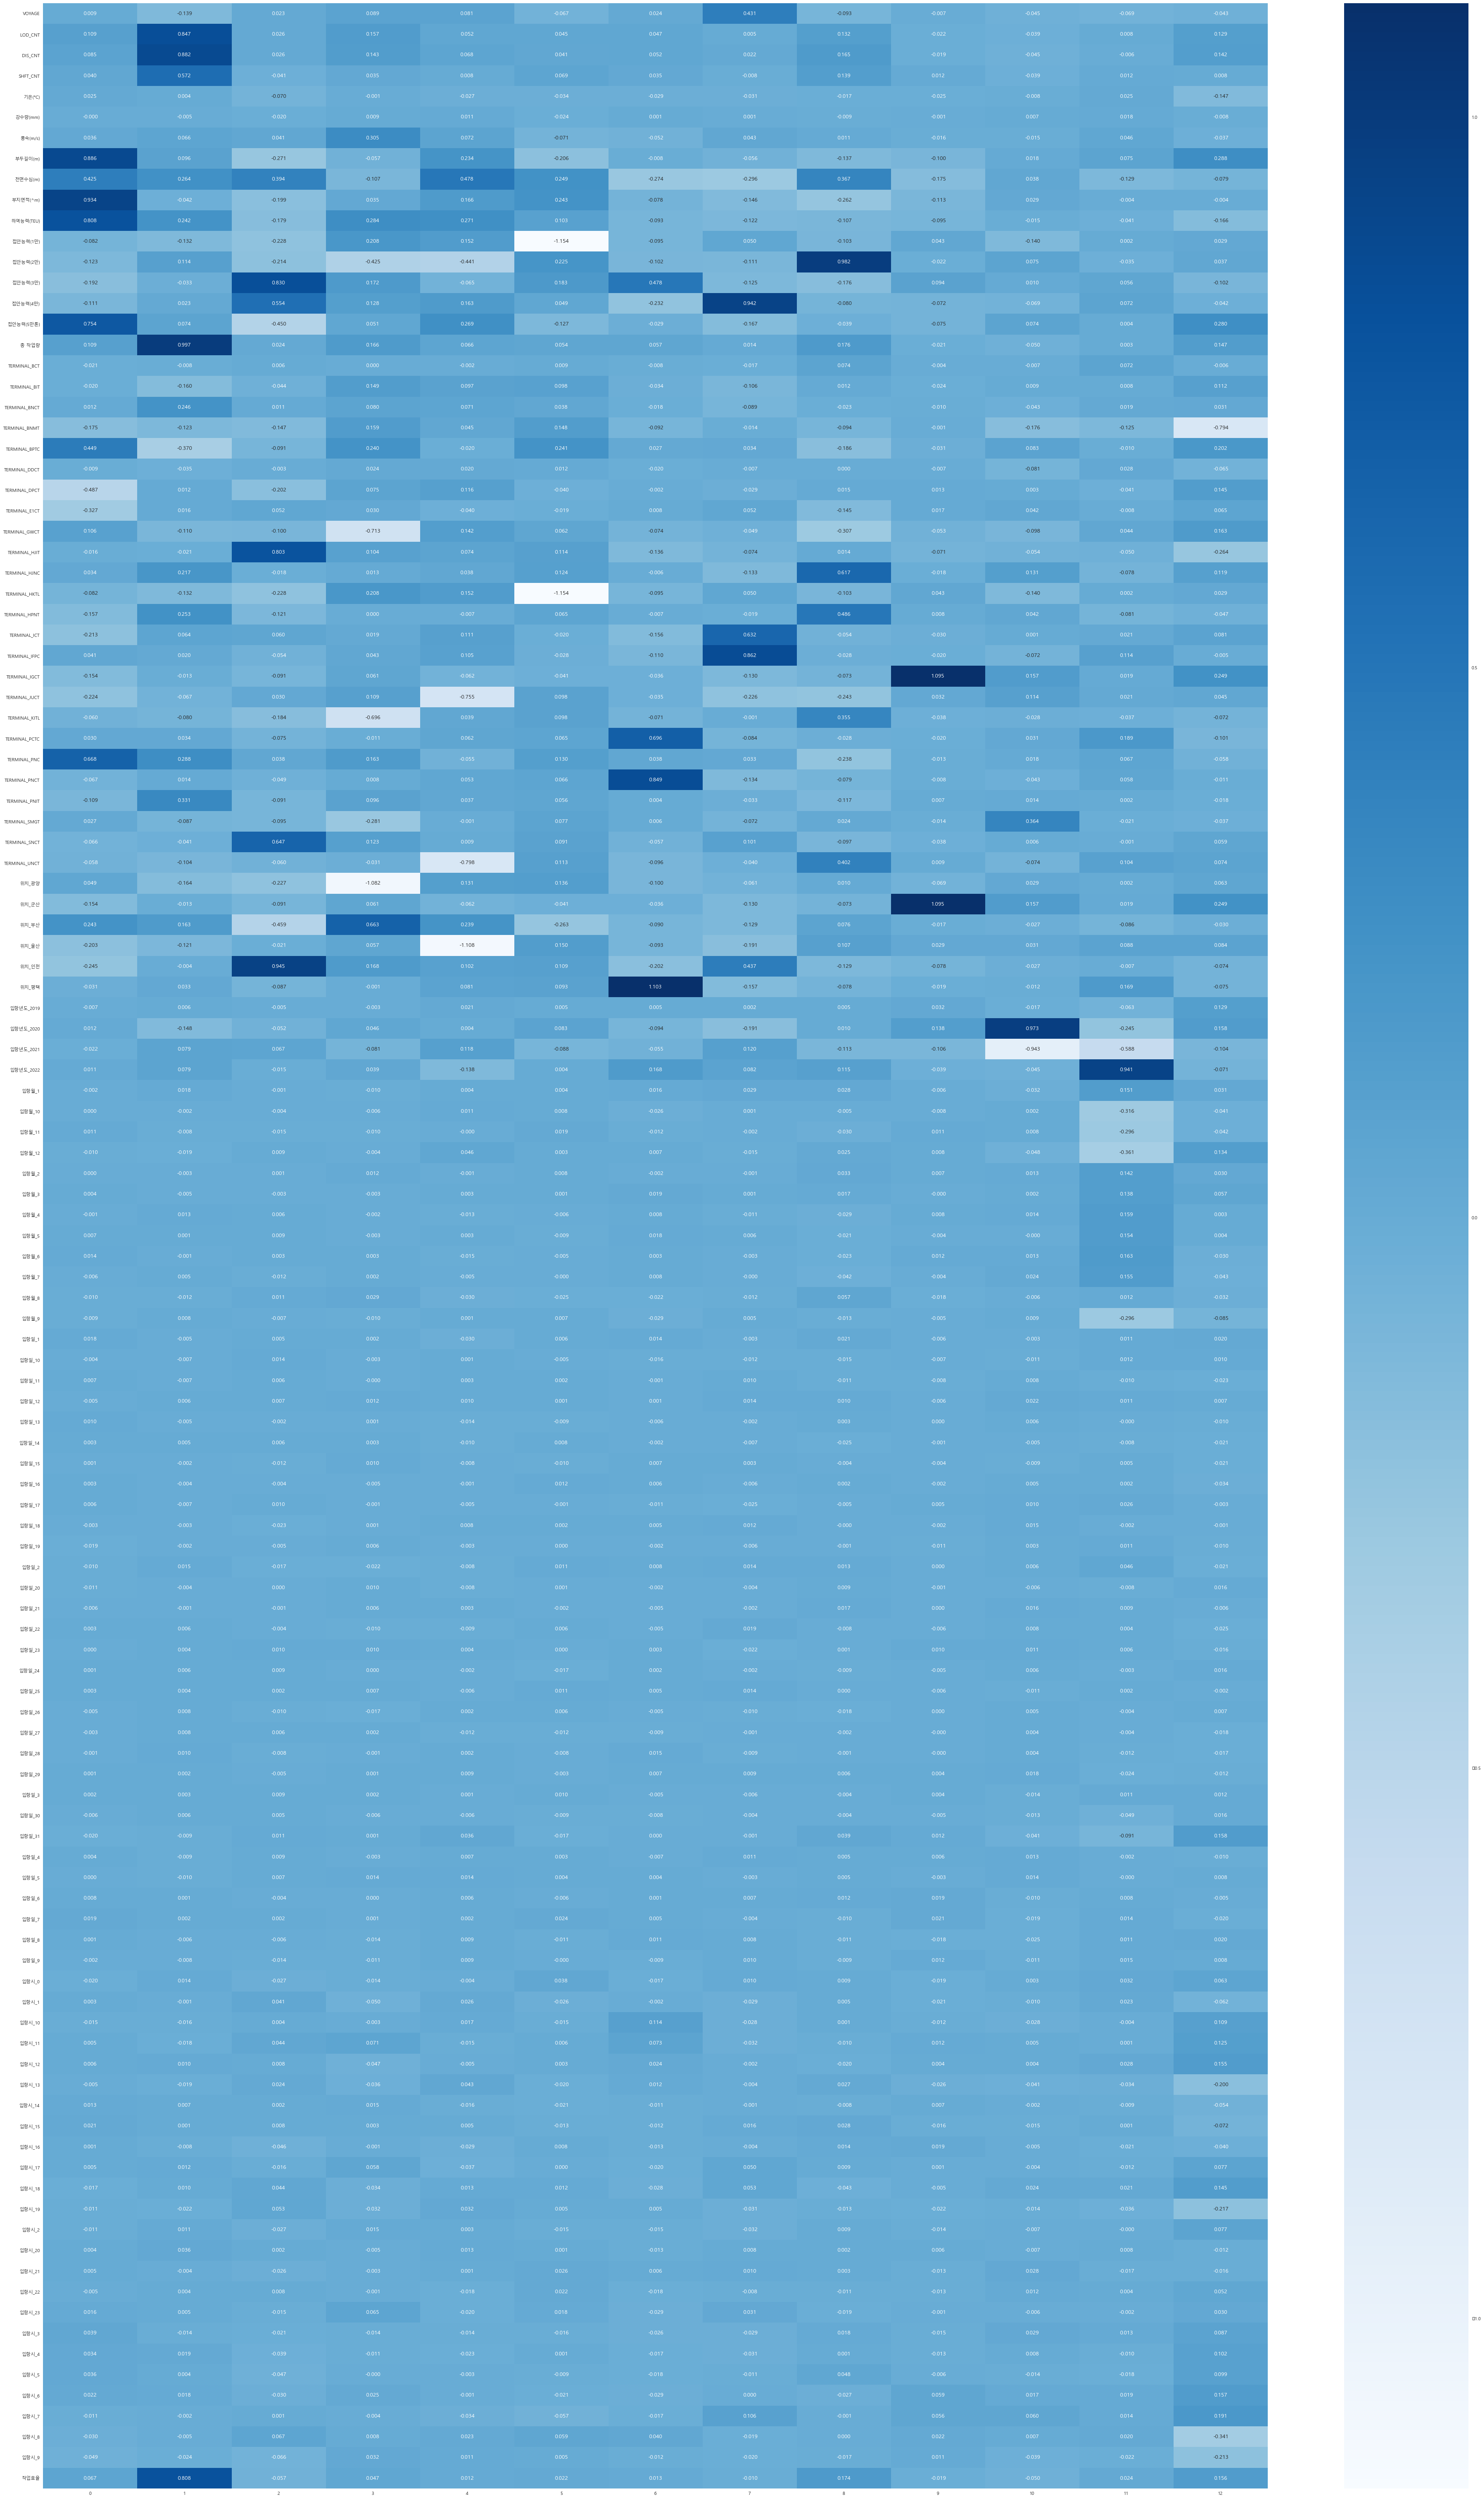

In [50]:
plt.figure(figsize = (60, 100))
sns.heatmap(fa_result, cmap = 'Blues', annot = True, fmt = '.3f')
plt.show()

In [22]:
X_train = fa.transform(X_train)
X_train.shape

(48468, 13)

In [28]:
X_test = X_test.fillna(X_test['작업효율'].mean())
X_test

,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),풍속(m/s),부두길이(m),전면수심(m),부지면적(^m),하역능력(TEU),접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),총 작업량,TERMINAL_BCT,TERMINAL_BIT,TERMINAL_BNCT,TERMINAL_BNMT,TERMINAL_BPTC,TERMINAL_DDCT,TERMINAL_DPCT,TERMINAL_E1CT,TERMINAL_GWCT,TERMINAL_HJIT,TERMINAL_HJNC,TERMINAL_HKTL,TERMINAL_HPNT,TERMINAL_ICT,TERMINAL_IFPC,TERMINAL_IGCT,TERMINAL_JUCT,TERMINAL_KITL,TERMINAL_PCTC,TERMINAL_PNC,TERMINAL_PNCT,TERMINAL_PNIT,TERMINAL_SMGT,TERMINAL_SNCT,TERMINAL_UNCT,위치_광양,위치_군산,위치_부산,위치_울산,위치_인천,위치_평택,입항년도_2019,입항년도_2020,입항년도_2021,입항년도_2022,입항월_1,입항월_10,입항월_11,입항월_12,입항월_2,입항월_3,입항월_4,입항월_5,입항월_6,입항월_7,입항월_8,입항월_9,입항일_1,입항일_10,입항일_11,입항일_12,입항일_13,입항일_14,입항일_15,입항일_16,입항일_17,입항일_18,입항일_19,입항일_2,입항일_20,입항일_21,입항일_22,입항일_23,입항일_24,입항일_25,입항일_26,입항일_27,입항일_28,입항일_29,입항일_3,입항일_30,입항일_31,입항일_4,입항일_5,입항일_6,입항일_7,입항일_8,입항일_9,입항시_0,입항시_1,입항시_10,입항시_11,입항시_12,입항시_13,입항시_14,입항시_15,입항시_16,입항시_17,입항시_18,입항시_19,입항시_2,입항시_20,입항시_21,입항시_22,입항시_23,입항시_3,입항시_4,입항시_5,입항시_6,입항시_7,입항시_8,입항시_9,작업효율
0,2,1341,2064,78,14.00,0.0,1.00,1100.0,18.00,688000,2310000,0,2,0,0,6,3483,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1784.125000
1,8,255,511,0,18.00,0.0,0.90,600.0,14.00,195000,552000,0,0,0,2,0,766,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,776.666667
2,53,300,300,0,25.84,6.3,2.08,1040.0,14.00,416000,1000000,0,0,2,0,2,600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,894.690141
3,2,694,499,0,-5.50,0.0,2.50,800.0,18.00,480000,1104000,0,0,2,1,0,1193,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,799.210526
4,43,291,278,0,26.90,0.0,4.00,1500.0,15.50,1151000,2236000,0,0,0,0,5,569,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,989.970297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12112,14,60,60,0,28.00,0.0,4.70,1224.0,18.00,768125,250000,0,2,0,0,0,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,629.106667
12113,21,391,476,0,23.30,0.1,0.70,2000.0,16.50,1210000,3677000,0,0,0,0,6,867,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,923.222222
12114,5,272,287,0,14.40,0.0,4.70,826.0,15.00,294000,819000,0,0,0,0,2,559,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,387.800000
12115,1,275,393,0,-2.00,0.0,3.60,1224.0,16.25,768125,1998100,0,0,0,0,4,668,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [29]:
X_test = fa.transform(X_test)
X_test.shape

(12117, 13)

In [30]:
# 모델링을 위해 데이터 재 결합
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

train_set = pd.concat([X_train, y_train], axis = 1)
test_set = pd.concat([X_test, y_test], axis = 1)
train_set.shape, test_set.shape

((48468, 14), (12117, 14))

In [32]:
regressor = setup(data = train_set,
                 target = '작업시간(분)',
                 numeric_imputation = 'mean',
                 train_size = 0.9,
                 normalize = True,
                 silent = True) 

,Description,Value
0,session_id,2198
1,Target,작업시간(분)
2,Original Data,"(48468, 14)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(43621, 13)"


In [33]:
# 오래 걸림 약 9분

best_3_model = compare_models(sort = 'MAPE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,206.1379,113990.1748,337.4002,0.7039,0.3279,0.2645,3.0270
rf,Random Forest Regressor,206.2735,113342.8041,336.3929,0.7055,0.3278,0.2648,10.3160
lightgbm,Light Gradient Boosting Machine,204.2778,111026.1656,332.9168,0.7116,0.3344,0.2722,0.2140
knn,K Neighbors Regressor,222.3045,126880.4828,356.0382,0.6704,0.3613,0.2919,0.1450
gbr,Gradient Boosting Regressor,223.6783,124524.3271,352.7277,0.6765,0.3702,0.3162,3.9250
dt,Decision Tree Regressor,285.1293,223032.0828,472.0079,0.4205,0.4371,0.3505,0.2540
huber,Huber Regressor,272.9150,172467.9545,415.2331,0.5519,0.4308,0.3640,0.0820
par,Passive Aggressive Regressor,277.3699,176953.5804,420.6087,0.5403,0.4422,0.3643,0.0480
ridge,Ridge Regression,279.7505,168300.9234,410.1793,0.5628,0.4449,0.4014,0.0220
lr,Linear Regression,279.7508,168300.9266,410.1793,0.5628,0.4449,0.4014,0.7030


In [34]:
# 약 11분 걸림 

blended_model = blend_models(estimator_list = best_3_model, fold = 10, optimize = 'MAPE')
pred_holdout = predict_model(blended_model)
final_model = finalize_model(blended_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,202.7716,109909.6213,331.5262,0.7068,0.3309,0.2710
1,202.3247,119636.1362,345.8846,0.6925,0.3186,0.2495
2,203.2045,114394.2841,338.2222,0.7078,0.3325,0.2695
3,198.7820,111677.8339,334.1823,0.7190,0.3156,0.2546
4,202.1818,110800.1186,332.8665,0.7150,0.3243,0.2635
5,200.8402,97182.0480,311.7404,0.7393,0.3208,0.2601
6,202.9568,119219.8781,345.2823,0.6852,0.3342,0.2661
7,207.8622,114354.0218,338.1627,0.7012,0.3364,0.2765
8,197.1973,96677.8368,310.9306,0.7524,0.3106,0.2536
9,194.0075,94825.2894,307.9372,0.7526,0.3140,0.2550


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,199.2939,117376.6473,342.6028,0.6971,0.3267,0.2644


In [36]:
from sklearn.metrics import r2_score

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

y_pred = predict_model(final_model, X_test)['Label']

print(r2_score(y_test.values, y_pred.values))
print(MAPE(y_test.values, y_pred.values))

0.7051342491578246
25.724378008760485


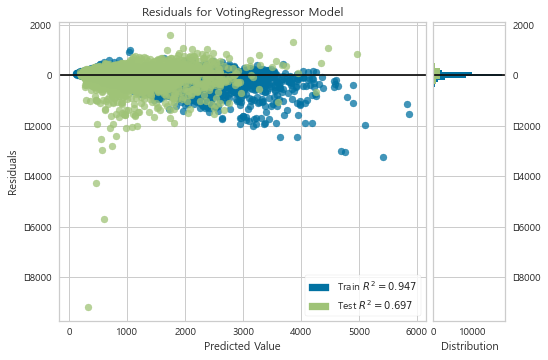

In [37]:
plot_model(blended_model)

In [38]:
save_model(final_model, 'final_model_with_FA')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='작업시간(분)',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                                             colsample_bytree=1.0,
                                                             importance_type='split',
                                                             learning_rate=0.1,
                                                             max